## DATA GATHERING AND CLEANING

In [40]:
import pandas as pd

In [42]:
filepath = '/Users/cansezgin/Python-Output/iris.csv'
data = pd.read_csv(filepath)
print(data.iloc[:5])

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [44]:
# custim missing values
data = pd.read_csv(filepath, na_values=['NA',99])

In [46]:
print(data.iloc[:5])

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## SQL

In [49]:
import sqlite3 as sq3
import pandas as pd

In [ ]:
path = 'data/classic_rock.db'
con = sq3.Connection(path)

In [53]:
query = ''' SELECT * FROM rock_songs;
'''

In [ ]:
# EXECUTE QUERY
data = pd.read_sql(query, con)

## NoSQL DATABASE (Document)

In [92]:
!pip install pymongo

In [93]:
from pymongo import MongoClient

### Create a Mongo connection
con = MongoClient()
### choose database
db = con.database_name
### create a cursor object using a query
cursor = db.collection_name.find(query)
### expand cursor and construct DataFrame
df = pd.DataFrame(list(cursor))

## API and Cloud Access

In [98]:
import pandas as pd

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df = pd.read_csv(data_url, header=None)

## PRACTICE LAB

In [101]:
# Imports
import sqlite3 as sq3
import pandas.io.sql as pds
import pandas as pd
import requests

In [103]:
# Schritt 1: Datenbank herunterladen
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/classic_rock.db'
local_path = 'classic_rock.db'

with open(local_path, 'wb') as f:
    f.write(requests.get(url).content)

# Schritt 2: Verbindung zur Datenbank aufbauen
con = sq3.connect(local_path)

In [104]:
# Schritt 3: Tabellen anzeigen (optional)
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Verfügbare Tabellen:", tables)

Verfügbare Tabellen: [('rock_songs',), ('rock_plays',)]


In [107]:
query = '''
SELECT *
FROM rock_songs;
'''

observations = pds.read_sql(query, con)
print(observations.head())

                     Song        Artist  Release_Year  PlayCount
0        Caught Up in You   .38 Special        1982.0         82
1         Hold On Loosely   .38 Special        1981.0         85
2  Rockin' Into the Night   .38 Special        1980.0         18
3       Art For Arts Sake          10cc        1975.0          1
4              Kryptonite  3 Doors Down        2000.0         13


In [109]:
query = '''
SELECT Artist, Release_Year, COUNT(*) AS num_songs, AVG(PlayCount) AS avg_plays
    FROM rock_songs
    GROUP BY Artist, Release_Year
    ORDER BY num_songs desc;
'''

# EXECUTE the query
observations = pds.read_sql(query, con)
observations.head()

,Artist,Release_Year,num_songs,avg_plays
0,The Beatles,1967.0,23,6.565217
1,Led Zeppelin,1969.0,18,21.000000
2,The Beatles,1965.0,15,3.800000
3,The Beatles,1968.0,13,13.000000
4,The Beatles,1969.0,13,15.000000


In [111]:
query='''
SELECT Artist, Release_Year, COUNT(*) AS num_songs, AVG(PlayCount) AS avg_plays  
    FROM rock_songs
    GROUP BY Artist, Release_Year
    ORDER BY num_songs desc;
'''

# Execute the query
observations_generator = pds.read_sql(query,
                            con,
                            coerce_float=True, # Doesn't efefct this dataset, because floats were correctly parsed
                            parse_dates=['Release_Year'], # Parse `Release_Year` as a date
                            chunksize=5 # Allows for streaming results as a series of shorter tables
                           )

for index, observations in enumerate(observations_generator):
    if index < 5:
        print(f'Observations index: {index}'.format(index))
        display(observations)

Observations index: 0


,Artist,Release_Year,num_songs,avg_plays
0,The Beatles,1970-01-01 00:32:47,23,6.565217
1,Led Zeppelin,1970-01-01 00:32:49,18,21.000000
2,The Beatles,1970-01-01 00:32:45,15,3.800000
3,The Beatles,1970-01-01 00:32:48,13,13.000000
4,The Beatles,1970-01-01 00:32:49,13,15.000000


Observations index: 1


,Artist,Release_Year,num_songs,avg_plays
0,Led Zeppelin,1970-01-01 00:32:50,12,13.166667
1,Led Zeppelin,1970-01-01 00:32:55,12,14.166667
2,Pink Floyd,1970-01-01 00:32:59,11,41.454545
3,Pink Floyd,1970-01-01 00:32:53,10,29.100000
4,The Doors,1970-01-01 00:32:47,10,28.900000


Observations index: 2


,Artist,Release_Year,num_songs,avg_plays
0,Fleetwood Mac,1970-01-01 00:32:57,9,35.666667
1,Jimi Hendrix,1970-01-01 00:32:47,9,24.888889
2,The Beatles,1970-01-01 00:32:43,9,2.444444
3,The Beatles,1970-01-01 00:32:44,9,3.111111
4,Elton John,1970-01-01 00:32:53,8,18.500000


Observations index: 3


,Artist,Release_Year,num_songs,avg_plays
0,Led Zeppelin,1970-01-01 00:32:51,8,47.750000
1,Led Zeppelin,1970-01-01 00:32:53,8,34.125000
2,Boston,1970-01-01 00:32:56,7,69.285714
3,Rolling Stones,1970-01-01 00:32:49,7,36.142857
4,Van Halen,1970-01-01 00:32:58,7,51.142857


Observations index: 4


,Artist,Release_Year,num_songs,avg_plays
0,Bruce Springsteen,1970-01-01 00:32:55,6,7.666667
1,Bruce Springsteen,1970-01-01 00:33:04,6,11.500000
2,Creedence Clearwater Revival,1970-01-01 00:32:49,6,23.833333
3,Creedence Clearwater Revival,1970-01-01 00:32:50,6,18.833333
4,Def Leppard,1970-01-01 00:33:07,6,32.000000


## DATA CLEANING

In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [3]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
os.system("kaggle datasets download -d shashanknecrothapa/ames-housing-dataset")

Dataset URL: https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset
License(s): unknown
ames-housing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


0

In [7]:
import zipfile

with zipfile.ZipFile("ames-housing-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("ames_housing")

print("Extracted files:", os.listdir("ames_housing"))

Extracted files: ['AmesHousing.csv']


In [9]:
import pandas as pd

# Load the dataset
housing = pd.read_csv("ames_housing/AmesHousing.csv")  # Adjust filename if different

# Show first 5 rows
print(housing.head(5))

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [13]:
housing["SalePrice"].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [15]:
housing["Sale Condition"].value_counts()

Sale Condition
Normal     2413
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: count, dtype: int64

In [17]:
hous_num = housing.select_dtypes(include = ['float64', 'int64'])
hous_num_corr = hous_num.corr()['SalePrice'][:-1] # -1 means that the latest row is SalePrice
top_features = hous_num_corr[abs(hous_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There is 11 strongly correlated values with SalePrice:
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Mas Vnr Area      0.508285
Name: SalePrice, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


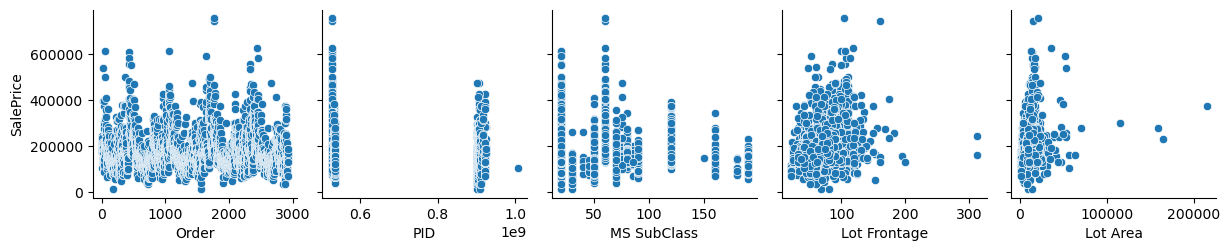

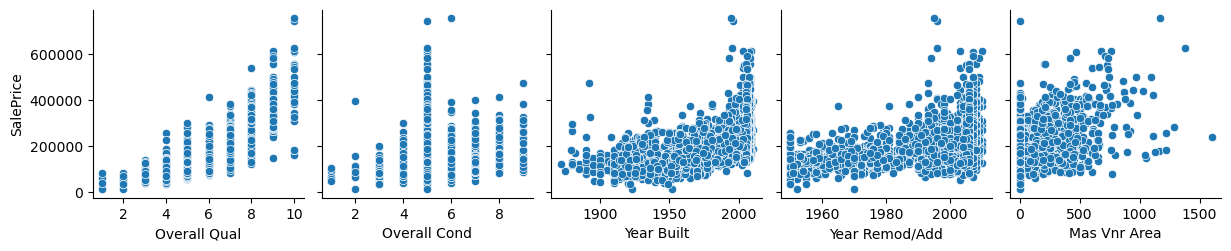

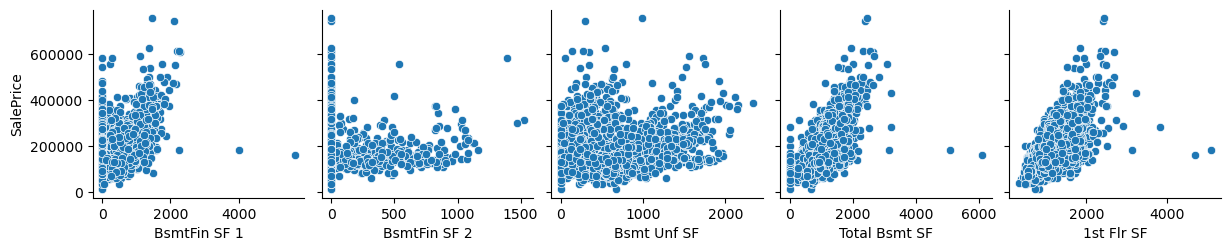

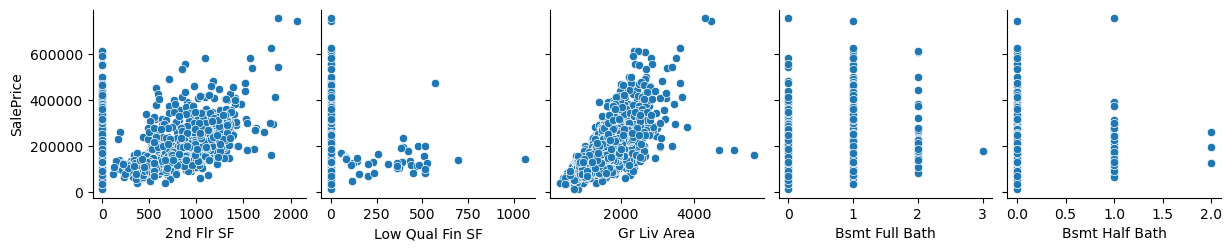

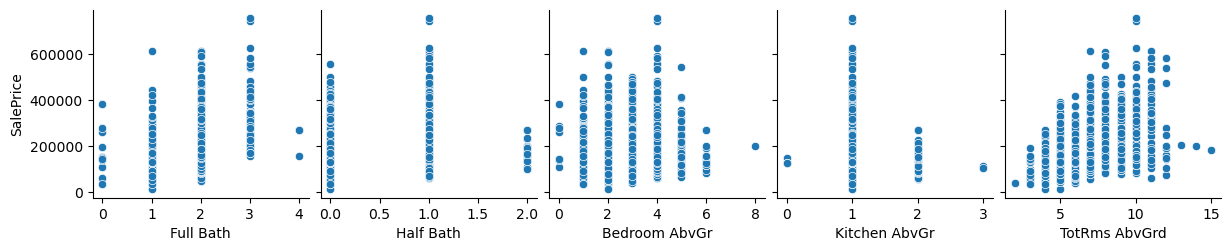

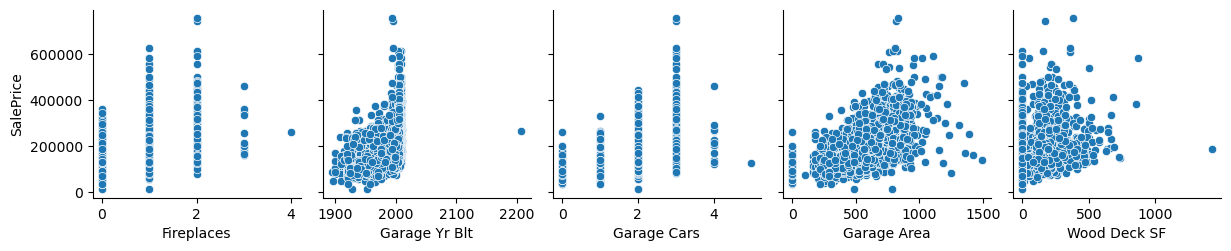

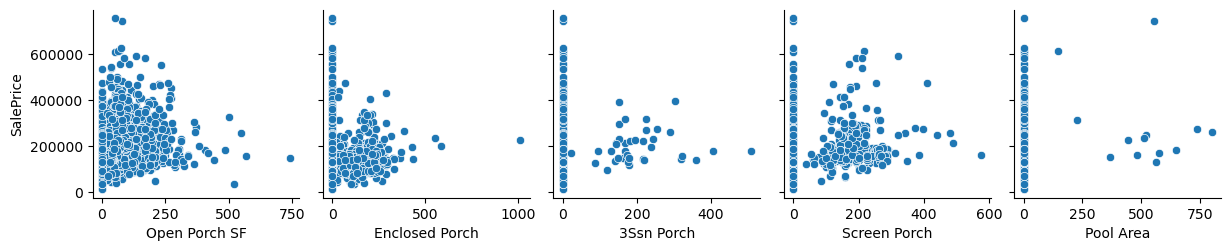

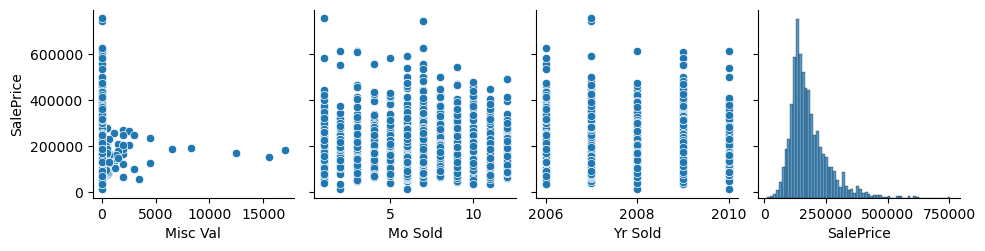

In [19]:
for i in range(0, len(hous_num.columns), 5):
    sns.pairplot(data=hous_num,
                x_vars=hous_num.columns[i:i+5],
                y_vars=['SalePrice'])

/var/folders/ls/jfgzf4j13hx__mtdgv2_0xbw0000gn/T/ipykernel_1074/3920264812.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sp_untransformed = sns.distplot(housing['SalePrice'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


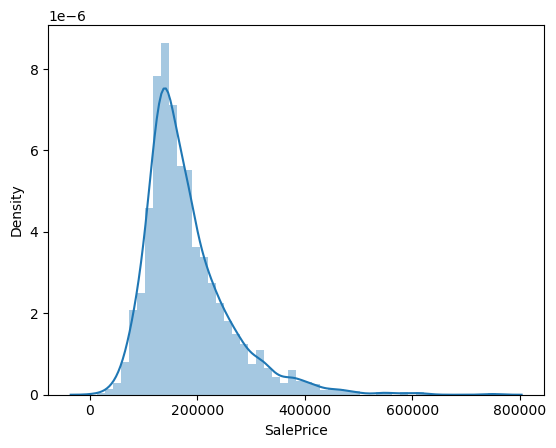

In [21]:
sp_untransformed = sns.distplot(housing['SalePrice'])

In [23]:
print("Skewness: %f" % housing['SalePrice'].skew())

Skewness: 1.743500



The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. In our case, we have ~1.7, so it is considered highly skewed data.

Now, we can try to transform our data, so it looks more normally distributed. We can use the np.log() function from the numpy library to perform log transform. This documentation contains more information about the numpy log transform.

In [27]:
log_transformed = np.log(housing['SalePrice'])

/var/folders/ls/jfgzf4j13hx__mtdgv2_0xbw0000gn/T/ipykernel_1074/904646796.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sp_transformed = sns.distplot(log_transformed)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


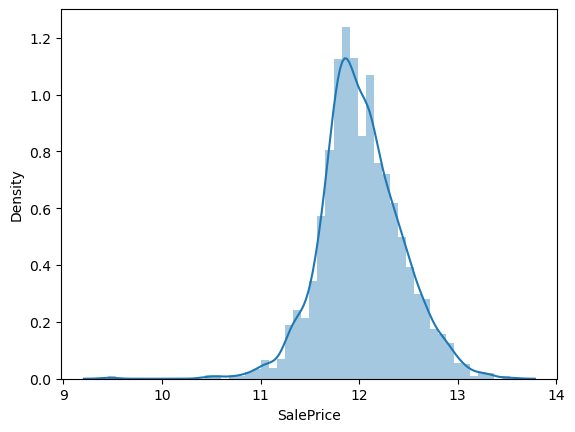

In [29]:
sp_transformed = sns.distplot(log_transformed)

In [33]:
print("Skewness: %f" % (log_transformed).skew())

Skewness: -0.014793


As we can see, the log method transformed the 'SalePrice' distribution into a more symmetrical bell curve and the skewness level now is -0.01, well within the range.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


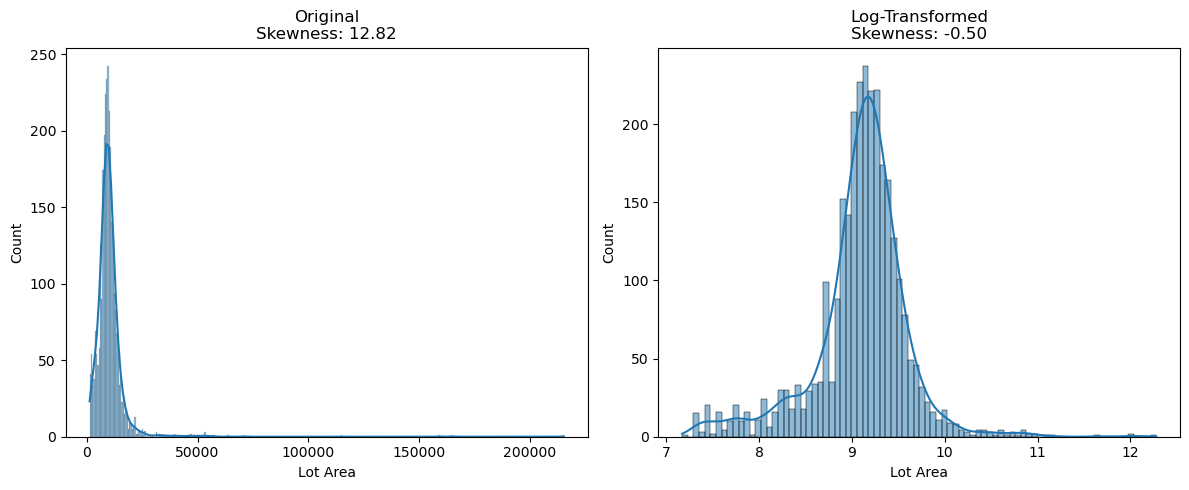

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Original data
original = housing['Lot Area']

# Transformed data (log)
transformed = np.log(original)

# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot original
sns.histplot(original, kde=True, ax=axes[0])
axes[0].set_title(f"Original\nSkewness: {original.skew():.2f}")

# Plot transformed
sns.histplot(transformed, kde=True, ax=axes[1])
axes[1].set_title(f"Log-Transformed\nSkewness: {transformed.skew():.2f}")

plt.tight_layout()
plt.show()


having duplicate values can effect our analysis, so it is good to check whether there are any duplicates in our data. We will use pandas duplicated() function and search by the 'PID' column, which contains a unique index number for each entry.

In [38]:
duplicate = housing[housing.duplicated(['PID'])]
duplicate

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


To remove it, we can use pandas drop_duplicates() function. By default, it removes all duplicate rows based on all the columns.

In [41]:
dup_removed = housing.drop_duplicates()
dup_removed 

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [43]:
housing.index.is_unique

True

to remove duplicates on a specific column by setting the subset equal to the column that contains the duplicate, such as 'Order'.

In [46]:
removed_sub = housing.drop_duplicates(subset=['Order'])

### MISSING VALUES

To summarize all the missing values in our dataset, we will use isnull() function. Then, we will add them all up, by using sum() function, sort them with sort_values() function, and plot the first 20 columns (as the majority of our missing values fall within first 20 columns), using the bar plot function from the matplotlib library.

Text(0.5, 1.0, 'Total Missing Values')

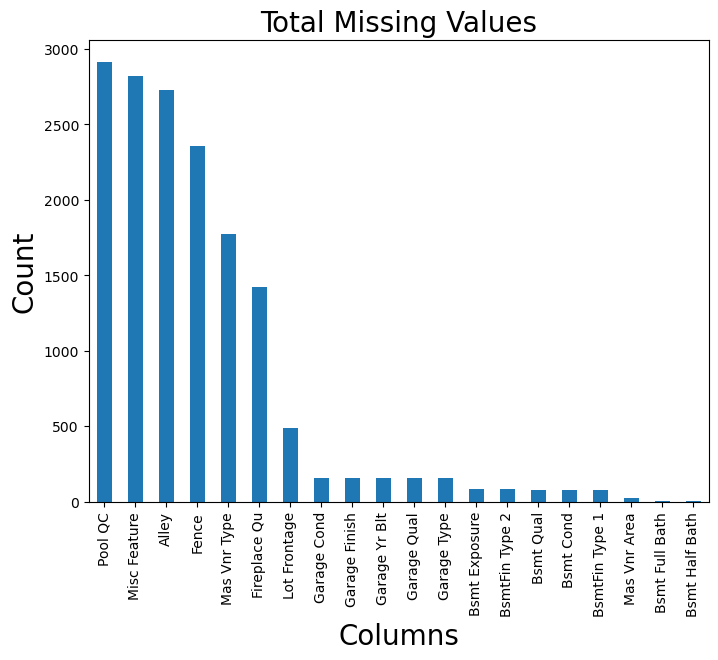

In [50]:
total = housing.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

We can drop the missing values, using dropna() method.

In [52]:
housing.dropna(subset=["Lot Frontage"])

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,2925,923251180,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,131000
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


We can drop the whole attribute (column), that contains missing values, using the drop() method.

In [54]:
housing.drop("Lot Frontage", axis=1)

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


We can replace the missing values (zero, the mean, the median, etc.), using fillna() method.

In [56]:
median = housing["Lot Frontage"].median()
median

68.0

In [58]:
housing["Lot Frontage"].fillna(median, inplace = True)

/var/folders/ls/jfgzf4j13hx__mtdgv2_0xbw0000gn/T/ipykernel_1074/3017488553.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["Lot Frontage"].fillna(median, inplace = True)


In [60]:
housing.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,68.0,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2929,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


let's look at 'Mas Vnr Area' feature and replace the missing values with the mean value of that column.

In [63]:
mean = housing["Mas Vnr Area"].mean()
housing["Mas Vnr Area"].fillna(mean, inplace = True)

/var/folders/ls/jfgzf4j13hx__mtdgv2_0xbw0000gn/T/ipykernel_1074/719179352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["Mas Vnr Area"].fillna(mean, inplace = True)


### FEATURE SCALING

There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

Min-max scaling (or normalization) is the simplest: values are shifted and rescaled so they end up ranging from 0 to 1. This is done by subtracting the min value and dividing by the max minus min.

In [67]:
norm_data = MinMaxScaler().fit_transform(hous_num)
norm_data

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.63636364e-01, 1.00000000e+00, 2.72444089e-01],
       [3.41413452e-04, 1.01788895e-04, 0.00000000e+00, ...,
        4.54545455e-01, 1.00000000e+00, 1.24238256e-01],
       [6.82826903e-04, 1.03806370e-04, 0.00000000e+00, ...,
        4.54545455e-01, 1.00000000e+00, 2.14509082e-01],
       ...,
       [9.99317173e-01, 8.25914814e-01, 3.82352941e-01, ...,
        5.45454545e-01, 0.00000000e+00, 1.60616051e-01],
       [9.99658587e-01, 8.27370610e-01, 0.00000000e+00, ...,
        2.72727273e-01, 0.00000000e+00, 2.11814430e-01],
       [1.00000000e+00, 8.27476641e-01, 2.35294118e-01, ...,
        9.09090909e-01, 0.00000000e+00, 2.36066294e-01]])

Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation, so that the resulting distribution has unit variance.

In [70]:
scaled_data = StandardScaler().fit_transform(hous_num)
scaled_data

array([[-1.73145976, -0.99716353, -0.87700484, ..., -0.44805744,
         1.678499  ,  0.42822875],
       [-1.73027748, -0.99690417, -0.87700484, ..., -0.07960156,
         1.678499  , -0.94895652],
       [-1.72909519, -0.99689903, -0.87700484, ..., -0.07960156,
         1.678499  , -0.11012549],
       ...,
       [ 1.72909519,  1.10724504,  0.64771625, ...,  0.28885432,
        -1.36011828, -0.61092014],
       [ 1.73027748,  1.11095437, -0.87700484, ..., -0.81651332,
        -1.36011828, -0.13516523],
       [ 1.73145976,  1.11122453,  0.06128506, ...,  1.76267783,
        -1.36011828,  0.09019236]])

use StandardScaler() and fit_transform() functions to standardize the 'SalePrice' feature only.

In [83]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaled_sprice = StandardScaler().fit_transform(housing['SalePrice'].values[:, np.newaxis])
scaled_sprice

array([[ 0.42822875],
       [-0.94895652],
       [-0.11012549],
       ...,
       [-0.61092014],
       [-0.13516523],
       [ 0.09019236]])

### HANDLING THE OUTLIERS

There are many ways to discover outliers in our data. We can do Uni-variate analysis (using one variable analysis) or Multi-variate analysis (using two or more variables). One of the simplest ways to detect an outlier is to inspect the data visually, by making box plots or scatter plots.

#### Uni-Variate Analysis

A box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles. Outliers may be plotted as individual points.

<Axes: xlabel='Lot Area'>

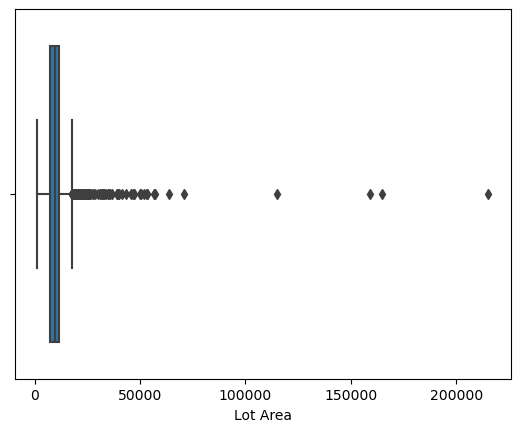

In [89]:
sns.boxplot(x=housing['Lot Area'])

<Axes: xlabel='SalePrice'>

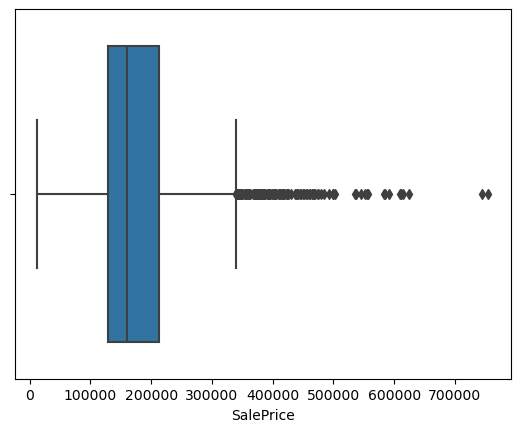

In [91]:
sns.boxplot(x=housing['SalePrice'])

#### Bi-Variate Analysis

the bi-variate analysis of the two features, the sale price, 'SalePrice', and the ground living area, 'GrLivArea', and plot the scatter plot of the relationship between these two parameters.

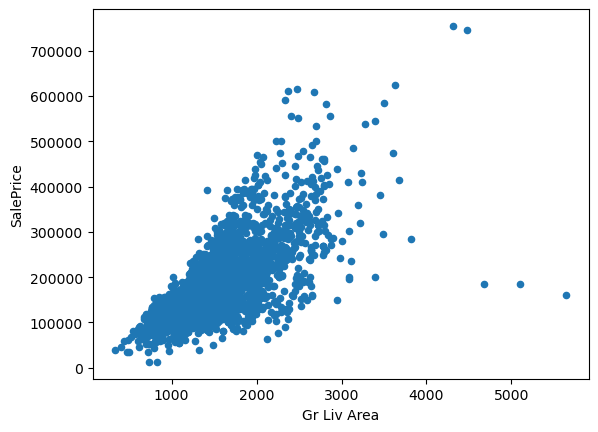

In [95]:
price_area = housing.plot.scatter(x='Gr Liv Area',
                                  y='SalePrice')

#### Deleting the Outliers

First, we will sort all of our 'Gr Liv Area' values and select only the last two.

In [110]:
housing.sort_values(by='Gr Liv Area', ascending=False)[:3]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750



Now we will use the pandas drop() function to remove these two rows.

In [113]:
outliers_dropped = housing.drop(housing.index[[1498,2180,2181]])

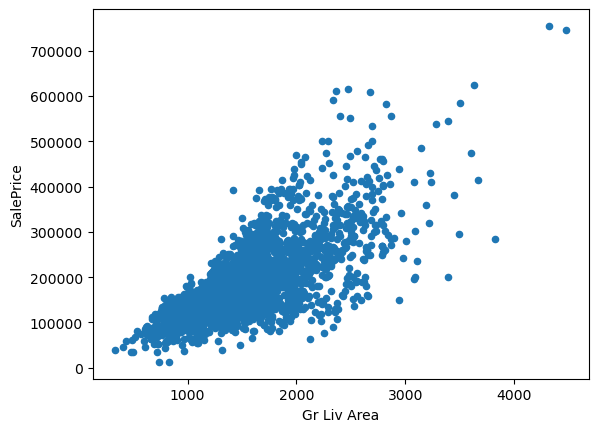

In [115]:
new_plot = outliers_dropped.plot.scatter(x='Gr Liv Area',
                                         y='SalePrice')

determine whether there are any outliers in the 'Lot Area' feature. You can either plot the box plot for the 'Lot Area', perform a bi-variate analysis by making a scatter plot between the 'SalePrice' and the 'Lot Area', or use the Z-score analysis. If there re any outliers, remove them from the dataset.

<Axes: xlabel='Lot Area'>

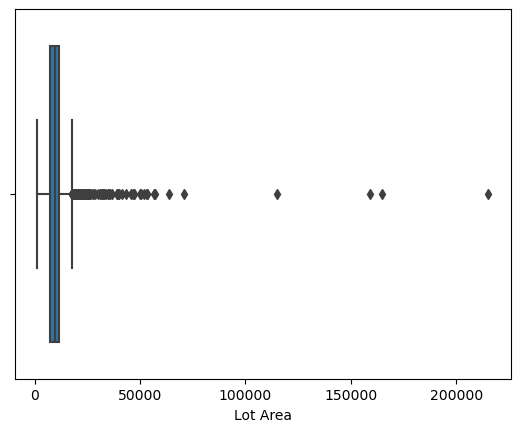

In [118]:
sns.boxplot(x=housing['Lot Area'])

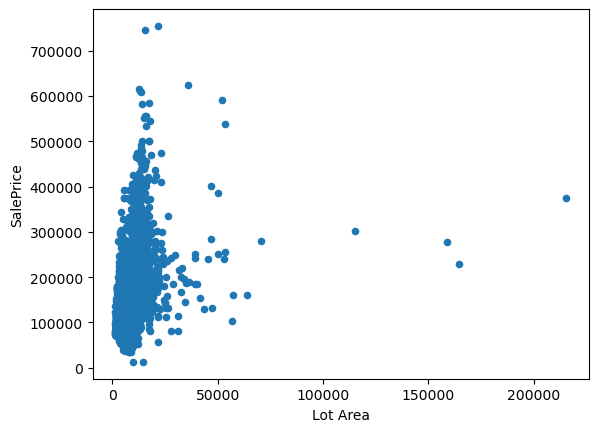

In [120]:
price_lot = housing.plot.scatter(x='Lot Area', y='SalePrice')

In [122]:
housing['Lot_Area_Stats'] = stats.zscore(housing['Lot Area'])

In [124]:
housing[['Lot Area', 'Lot_Area_Stats']].describe().round(3)

,Lot Area,Lot_Area_Stats
count,2930.000,2930.000
mean,10147.922,0.000
std,7880.018,1.000
min,1300.000,-1.123
25%,7440.250,-0.344
50%,9436.500,-0.090
75%,11555.250,0.179
max,215245.000,26.032


In [162]:
housing.sort_values(by='Lot Area', ascending=False)[:1]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Lot_Area_Stats
956,957,916176125,20,RL,150.0,215245,Pave,NaN,IR3,Low,...,NaN,NaN,NaN,0,6,2009,WD,Normal,375000,26.031932


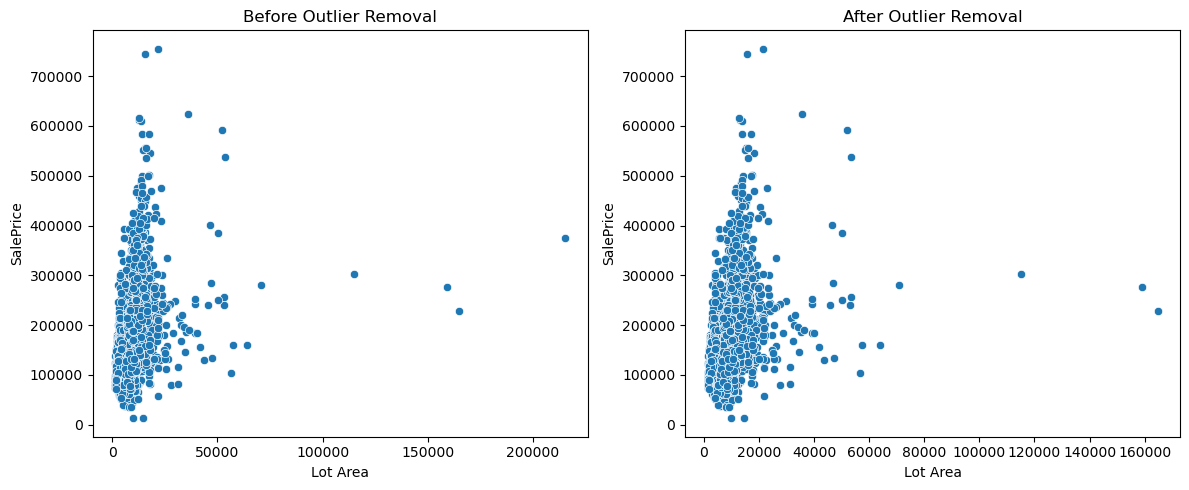

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 1: Z-score transformation to detect outliers
housing['Lot_Area_Stats'] = stats.zscore(housing['Lot Area'])

# Step 2: Scatterplot BEFORE removing outlier
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=housing['Lot Area'], y=housing['SalePrice'])
plt.title('Before Outlier Removal')
plt.xlabel('Lot Area')
plt.ylabel('SalePrice')

# Step 3: Remove the known outlier (index 957)
lot_area_rem = housing.drop(housing.index[[956]])

# Step 4: Scatterplot AFTER removing outlier
plt.subplot(1, 2, 2)
sns.scatterplot(x=lot_area_rem['Lot Area'], y=lot_area_rem['SalePrice'])
plt.title('After Outlier Removal')
plt.xlabel('Lot Area')
plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

There seems to be one outlier, the very last point in the 'Lot Area' is too far from the rest of the group. Also, according to the Z-score, the standard deviation of that point exceeds the threshhold of 3.

#### Z-Score Analysis

Z-score is another way to identify outliers mathematically. Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. In another words, Z-score is the value that quantifies relationship between a data point and a standard deviation and mean values of a group of points. Data points which are too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used. For example, if the Z-score value is greater than or less than 3 or -3 standard deviations respectively, that data point will be identified as a outlier.

In [171]:
housing['LQFSF_Stats'] = stats.zscore(housing['Low Qual Fin SF'])

In [173]:
housing[['Low Qual Fin SF', 'LQFSF_Stats']].describe().round(3)

,Low Qual Fin SF,LQFSF_Stats
count,2930.000,2930.000
mean,4.677,0.000
std,46.311,1.000
min,0.000,-0.101
25%,0.000,-0.101
50%,0.000,-0.101
75%,0.000,-0.101
max,1064.000,22.878


The scaled results show a mean of 0.000 and a standard deviation of 1.000, indicating that the transformed values fit the z-scale model. The max value of 22.882 is further proof of the presence of outliers, as it falls well above the z-score limit of +3.